# <font color='black'>**Bitcoin Price Prediction (PRML Bonus Project)**</font>

#### Mounting Drive on Google Colab

In [477]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing Basic Libraries

In [478]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the dataset

In [479]:
data = pd.read_csv('/content/drive/MyDrive/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv', parse_dates=['Date'], index_col = ['Date'])
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


#### Preprocessing and Visualization of the dataset

In [480]:
data.head

<bound method NDFrame.head of                Open     High      Low    Close         Volume      Market Cap
Date                                                                         
2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000  45,535,800,000
2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000  44,890,700,000
2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000  46,246,700,000
2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000  44,144,400,000
2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000  41,816,500,000
...             ...      ...      ...      ...            ...             ...
2013-05-02   116.38   125.60    92.28   105.21              -   1,292,190,000
2013-05-01   139.00   139.89   107.72   116.99              -   1,542,820,000
2013-04-30   144.00   146.93   134.05   139.00              -   1,597,780,000
2013-04-29   134.44   147.49   134.00   144.54              -   1,491,160,000
2013-04-28   135.30   135.98   132

In [481]:
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [482]:
data.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [483]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1556 entries, 2017-07-31 to 2013-04-28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-null   float64
 3   Close       1556 non-null   float64
 4   Volume      1556 non-null   object 
 5   Market Cap  1556 non-null   object 
dtypes: float64(4), object(2)
memory usage: 85.1+ KB


In [484]:
data.corr()['Close']

Open     0.997514
High     0.998596
Low      0.998755
Close    1.000000
Name: Close, dtype: float64

In [485]:
data.drop(['Volume', 'Market Cap'], axis = 1, inplace = True) # dropping the unnecessary features

In [486]:
data

,Open,High,Low,Close
Date,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34
2017-07-30,2724.39,2758.53,2644.85,2757.18
2017-07-29,2807.02,2808.76,2692.80,2726.45
2017-07-28,2679.73,2897.45,2679.73,2809.01
2017-07-27,2538.71,2693.32,2529.34,2671.78
...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21
2013-05-01,139.00,139.89,107.72,116.99
2013-04-30,144.00,146.93,134.05,139.00


In [487]:
data.isnull() # checking if any value in the dataset is null

,Open,High,Low,Close
Date,,,,
2017-07-31,False,False,False,False
2017-07-30,False,False,False,False
2017-07-29,False,False,False,False
2017-07-28,False,False,False,False
2017-07-27,False,False,False,False
...,...,...,...,...
2013-05-02,False,False,False,False
2013-05-01,False,False,False,False
2013-04-30,False,False,False,False


In [488]:
data.duplicated().sum # checking if there is any null value on any date

<bound method NDFrame._add_numeric_operations.<locals>.sum of Date
2017-07-31    False
2017-07-30    False
2017-07-29    False
2017-07-28    False
2017-07-27    False
              ...  
2013-05-02    False
2013-05-01    False
2013-04-30    False
2013-04-29    False
2013-04-28    False
Length: 1556, dtype: bool>

In [489]:
data.isnull().sum() # number of null values of every feature

Open     0
High     0
Low      0
Close    0
dtype: int64

In [490]:
data.isnull().any() # rechecking if there are any null values in any feature

Open     False
High     False
Low      False
Close    False
dtype: bool

In [491]:
data.shape # shape of the dataset

(1556, 4)

In [492]:
data.head() # top 5 rows of the dataset

,Open,High,Low,Close
Date,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34
2017-07-30,2724.39,2758.53,2644.85,2757.18
2017-07-29,2807.02,2808.76,2692.80,2726.45
2017-07-28,2679.73,2897.45,2679.73,2809.01
2017-07-27,2538.71,2693.32,2529.34,2671.78


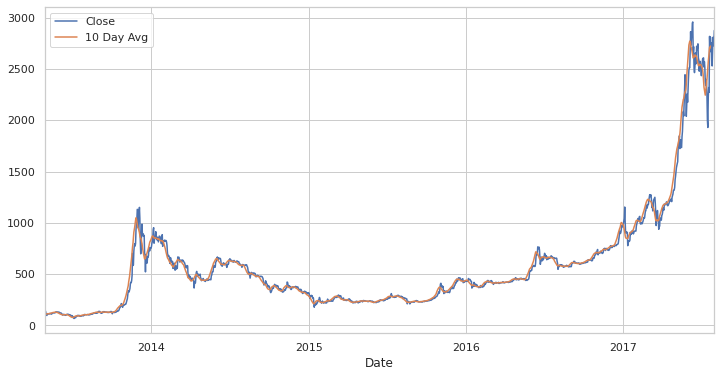

In [493]:
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
data['Close'].plot(figsize=(12,6),label='Close')
data['Close'].rolling(window=10).mean().plot(label='10 Day Avg')
# Plotting the rolling 10 day average against the Close Price
plt.legend()

In [494]:
# adding a new feature in the dataset which contains the average of other 4 feature values, so that we get better accuracy
data['AvgDayPrice'] = (data['Close'] + data['High'] + data['Low'] + data['Open'])/4

In [495]:
data

,Open,High,Low,Close,AvgDayPrice
Date,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,2812.2025
2017-07-30,2724.39,2758.53,2644.85,2757.18,2721.2375
2017-07-29,2807.02,2808.76,2692.80,2726.45,2758.7575
2017-07-28,2679.73,2897.45,2679.73,2809.01,2766.4800
2017-07-27,2538.71,2693.32,2529.34,2671.78,2608.2875
...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,109.8675
2013-05-01,139.00,139.89,107.72,116.99,125.9000
2013-04-30,144.00,146.93,134.05,139.00,140.9950


In [496]:
# adding a feature which contains price of bitcoin after 10 days (target feature)
data['ClosingPriceAfter10days'] = data['Close'].shift(10)

In [497]:
data # we have some null values now because we don't have the data of bitcoin price after 31st july 2017

,Open,High,Low,Close,AvgDayPrice,ClosingPriceAfter10days
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,2812.2025,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,2721.2375,NaN
2017-07-29,2807.02,2808.76,2692.80,2726.45,2758.7575,NaN
2017-07-28,2679.73,2897.45,2679.73,2809.01,2766.4800,NaN
2017-07-27,2538.71,2693.32,2529.34,2671.78,2608.2875,NaN
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,109.8675,115.00
2013-05-01,139.00,139.89,107.72,116.99,125.9000,115.24
2013-04-30,144.00,146.93,134.05,139.00,140.9950,117.20


In [498]:
data.head()

,Open,High,Low,Close,AvgDayPrice,ClosingPriceAfter10days
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,2812.2025,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,2721.2375,NaN
2017-07-29,2807.02,2808.76,2692.80,2726.45,2758.7575,NaN
2017-07-28,2679.73,2897.45,2679.73,2809.01,2766.4800,NaN
2017-07-27,2538.71,2693.32,2529.34,2671.78,2608.2875,NaN


In [499]:
data.dropna(inplace=True) # dropping the rows containing null values

In [500]:
data

,Open,High,Low,Close,AvgDayPrice,ClosingPriceAfter10days
Date,,,,,,
2017-07-21,2838.41,2838.41,2621.85,2667.76,2741.6075,2875.34
2017-07-20,2269.89,2900.70,2269.89,2817.60,2564.5200,2757.18
2017-07-19,2323.08,2397.17,2260.23,2273.43,2313.4775,2726.45
2017-07-18,2233.52,2387.61,2164.77,2318.88,2276.1950,2809.01
2017-07-17,1932.62,2230.49,1932.62,2228.41,2081.0350,2671.78
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,109.8675,115.00
2013-05-01,139.00,139.89,107.72,116.99,125.9000,115.24
2013-04-30,144.00,146.93,134.05,139.00,140.9950,117.20


In [501]:
data.head()

,Open,High,Low,Close,AvgDayPrice,ClosingPriceAfter10days
Date,,,,,,
2017-07-21,2838.41,2838.41,2621.85,2667.76,2741.6075,2875.34
2017-07-20,2269.89,2900.70,2269.89,2817.60,2564.5200,2757.18
2017-07-19,2323.08,2397.17,2260.23,2273.43,2313.4775,2726.45
2017-07-18,2233.52,2387.61,2164.77,2318.88,2276.1950,2809.01
2017-07-17,1932.62,2230.49,1932.62,2228.41,2081.0350,2671.78


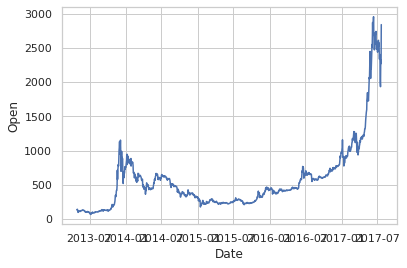

In [502]:
sns.lineplot(data = data, x='Date', y='Open') # visualizing the daily change in opening price of bitcoin

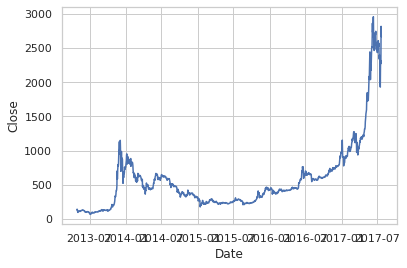

In [503]:
sns.lineplot(data = data, x='Date', y='Close') # visualizing the daily change in closing price of bitcoin

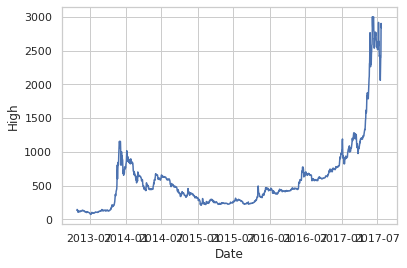

In [504]:
sns.lineplot(data = data, x='Date', y='High') # visualizing the daily change in high price of bitcoin

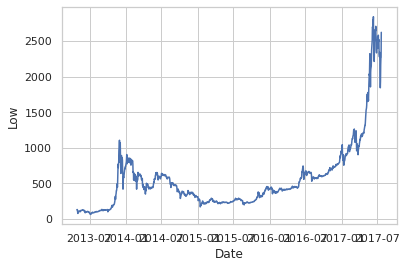

In [505]:
sns.lineplot(data = data, x='Date', y='Low') # visualizing the daily change in low price of bitcoin

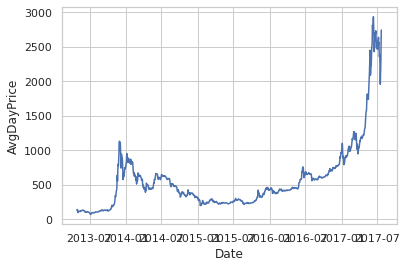

In [506]:
sns.lineplot(data = data, x='Date', y='AvgDayPrice') # visualizing the daily change in average day price of bitcoin

#### Dividing the dataset into two groups (to_be_predicted_feature and input_features)

In [507]:
x= data.drop(columns=['ClosingPriceAfter10days'])
y=data['ClosingPriceAfter10days']

#### Splitting the dataset into training and testing dataset

In [508]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [509]:
X_train

,Open,High,Low,Close,AvgDayPrice
Date,,,,,
2016-11-02,730.07,740.83,722.35,740.83,733.5200
2013-07-16,98.89,99.86,96.14,97.45,98.0850
2015-01-11,274.61,279.64,265.04,265.66,271.2375
2016-12-02,757.54,781.30,757.54,777.94,768.5800
2013-11-24,795.63,807.36,722.87,774.25,775.0275
...,...,...,...,...,...
2014-06-17,591.59,610.89,590.40,610.86,600.9350
2014-01-04,823.27,859.51,801.67,859.51,835.9900
2015-03-14,284.44,286.34,280.98,281.88,283.4100


# Implementing different models and building a pipeline

#### Importing necessary libraries

In [510]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

## Model 1 : LinearRegression

### Analysing 1st Model

In [511]:
step1= ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])],remainder='passthrough')
step2=LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score :', r2_score(Y_test,y_pred))

R2 score : 0.9595479455040584


## Model 2 : KNeighborsRegressor

#### Implementing RandomizedSearchCV to identify the best parameters

In [512]:
# gridParams = {
#     'n_neighbors': range(2,10),
#     'weights': ['uniform', 'distance'],
#     'leaf_size' : range(20,50),
#     'p' : range(1,10),
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(KNeighborsRegressor(),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing the best parameters

In [513]:
# print(step2.best_params_)
# (n_neighbors=12, weights = 'distance', p=2, leaf_size = 36)

### Analysing 2nd Model

In [514]:
#using_KNN

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=12, weights = 'distance', p=2, leaf_size = 36)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))

R2 score 0.982804030893062


## Model 3 : RandomForestRegressor

#### Implementing RandomizedSearchCV to identify the best parameters

In [515]:
# gridParams = {
#     'n_estimators': range(90,400),
#     'criterion': ['squared_error', 'absolute_error', 'poisson'],
#     'max_depth' : range(3,16),
#     'min_samples_split' : range(2,10),
#     'min_samples_leaf' : range(2,10),
#     'max_features' : ['auto', 'sqrt', 'log2']
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(RandomForestRegressor(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing the best parameters

In [516]:
# print(step2.best_params_)
# (n_estimators=227,max_features=0.3,max_depth=15, criterion = 'absolute_error',min_samples_split = 2, min_samples_leaf = 3)

### Analysing 3rd Model

In [517]:
#Random forest approach
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=227,random_state=0,max_features=0.3,max_depth=15, criterion = 'absolute_error',
                              min_samples_split = 2, min_samples_leaf = 3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score :',r2_score(Y_test,y_pred))

R2 score : 0.981511118417228


## Model 4 : DecisionTreeRegressor

#### Implementing RandomizedSearchCV to identify the best parameters

In [518]:
# gridParams = {
#     'splitter': ['best', 'random'],
#     'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#     'max_depth' : range(3,16),
#     'min_samples_split' : range(2,10),
#     'min_samples_leaf' : range(2,10),
#     'max_features' : ['auto', 'sqrt', 'log2']
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(DecisionTreeRegressor(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing the best parameters

In [519]:
# print(step2.best_params_)
# (min_samples_split = 5, max_features = 'log2', criterion = 'friedman_mse', splitter = 'random' , min_samples_leaf = 2, max_depth = 14)

### Analysing 4th Model

In [520]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = DecisionTreeRegressor(min_samples_split = 5, max_features = 'log2', criterion = 'friedman_mse', splitter = 'random' , 
                              min_samples_leaf = 2, max_depth = 14, random_state = 0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score :',r2_score(Y_test,y_pred))

R2 score : 0.980426628891348


## Model 5 : XGBRegressor

#### Implementing RandomizedSearchCV to identify the best parameters

In [521]:
# from sklearn.model_selection import RandomizedSearchCV
# gridParams = {
#     'n_estimators' : range(1,200),
#     'max_depth' : range(3,16)
# }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(XGBRegressor(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing the best parameters

In [522]:
# print(step2.best_params_)
# (n_estimators=40,max_depth=6)

### Analysing 5th Model

In [523]:
#Xg_boost
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=40,max_depth=6, learning_rate=0.25)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score :',r2_score(Y_test,y_pred))

[00:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score : 0.9827432612848608


## Model 6 : LGBMRegressor

#### Implementing RandomizedSearchCV to identify the best parameters

In [524]:
# gridParams = {
#     'n_estimators' : range(90,400),
#     'learning_rate': [0.05,0.04,0.03,0.07,0.09],
#     'num_leaves': range(30,200,5),
#     'max_depth' : range(3,16),
#     'colsample_bytree' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(LGBMRegressor(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing the best parameters

In [525]:
# print(step2.best_params_)
# (num_leaves=120, max_depth = 5, n_estimators = 120, learning_rate = 0.13, colsample_bytree = 0.7)

### Analysing 6th Model

In [526]:
# using_LGBMRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')
step2 = LGBMRegressor(num_leaves=120, max_depth = 5, n_estimators = 120,
                       learning_rate = 0.13, colsample_bytree = 0.7, random_state = 0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)
print('R2 score :', r2_score(Y_test,y_pred))

R2 score : 0.9818203184051063


## Building a pipeline of these 5 models

#### Adding best 5 models into the pipeline with their best parameters

In [527]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')


knn = KNeighborsRegressor(n_neighbors=12, weights = 'distance', p=2, leaf_size = 36)
rf = RandomForestRegressor(n_estimators=227,random_state=0,max_features=0.3,max_depth=15, criterion = 'absolute_error',
                              min_samples_split = 2, min_samples_leaf = 3)
dt = DecisionTreeRegressor(min_samples_split = 5, max_features = 'log2', criterion = 'friedman_mse', splitter = 'random' , 
                              min_samples_leaf = 2, max_depth = 14, random_state = 0)
xgb = XGBRegressor(n_estimators=40,max_depth=6, learning_rate=0.25)
lgbm = LGBMRegressor(num_leaves=120, max_depth = 5, n_estimators = 120,
                       learning_rate = 0.13, colsample_bytree = 0.7, random_state = 0)

step2 = VotingRegressor([('knn', knn), ('rf', rf), ('dt', dt), ('xgb',xgb), ('lgbm',lgbm)])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score :',r2_score(Y_test,y_pred))

[00:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score : 0.9838108554888297


## Predicting the bitcoin prices of next 10 days starting from the latest date in the dataset

### Taking the latest 10 values from the dataset and storing the predictions

In [528]:
X_next10days = x[:10]
forecast=pipe.predict(X_next10days)

### Creating a new column to add these 10 predicted values at their respective dates for a better visualization

In [529]:
from datetime import datetime, timedelta
last_date=data.iloc[0].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=10,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
data=data.append(df1)
data.head()

,Open,High,Low,Close,AvgDayPrice,ClosingPriceAfter10days,Forecast
2017-07-21,2838.41,2838.41,2621.85,2667.76,2741.6075,2875.34,NaN
2017-07-20,2269.89,2900.70,2269.89,2817.60,2564.5200,2757.18,NaN
2017-07-19,2323.08,2397.17,2260.23,2273.43,2313.4775,2726.45,NaN
2017-07-18,2233.52,2387.61,2164.77,2318.88,2276.1950,2809.01,NaN
2017-07-17,1932.62,2230.49,1932.62,2228.41,2081.0350,2671.78,NaN


In [530]:
data.tail()

,Open,High,Low,Close,AvgDayPrice,ClosingPriceAfter10days,Forecast
2017-07-27,NaN,NaN,NaN,NaN,NaN,NaN,2404.147121
2017-07-28,NaN,NaN,NaN,NaN,NaN,NaN,2634.427249
2017-07-29,NaN,NaN,NaN,NaN,NaN,NaN,2751.423892
2017-07-30,NaN,NaN,NaN,NaN,NaN,NaN,2713.025061
2017-07-31,NaN,NaN,NaN,NaN,NaN,NaN,2779.859337


### Visualizing the price of bitcoin along with the 10 predicted prices

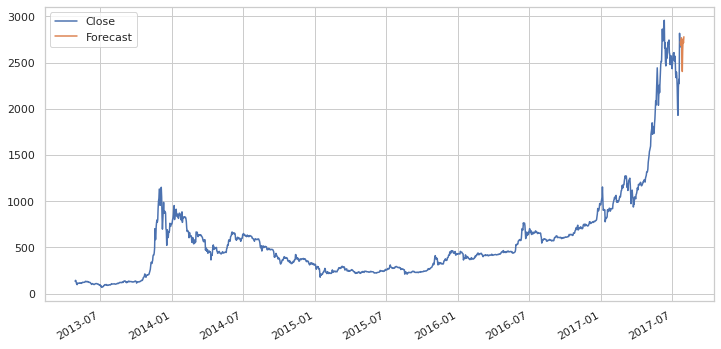

In [531]:
data['Close'].plot(figsize=(12,6),label='Close')
data['Forecast'].plot(label='Forecast')
plt.legend()

## Opening the pickle files

In [532]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

# Predicting the bitcoin price after 10 days from the given feature values of today

In [533]:
# you have to make a list, containing all the feature values at their respective respective indexes
# add that list in model.predict
# run this block
# output will be the predicted price after 10 days

''' list format according to features ['Open', 'High', 'Low', 'Close', 'AvgDayValue (average of other 4 values)'] '''
import joblib
model = joblib.load('/content/pipe.pkl')
result = model.predict([[2838.41,2838.41, 2621.85, 2667.76, 2741.6075]])[0]
print("\n", "Bitcoin Price After 10 days is :", result)

[00:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Bitcoin Price After 10 days is : 2727.059894223558
